In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #KNN분류모델

## 1.문제정의
- iris(붓꽃)데이터를 활용
- 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 4가지 특징을 통해서 3가지 품종을 구분
- KNN모델의 이웃의 숫자를 조절해보자(하이퍼파라미터 튜닝)

## 2.데이터 수집

In [26]:
# sklearn에서 제공하는 붓꽃 데이터 사용
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [27]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [28]:
# 데이터 프레임의 실제 값
# 문제 데이터
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [29]:
#문제에 대한 정답
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
iris_data['frame']

In [31]:
# 정답 값이 0, 1, 2
# 0:setosa
# 1:versicolor
# 2:virginica
iris_data['target_names'] 
#머신러닝 학습할려면 모든 데이터가 수치형데이터가 필요하기 때문에 글자형 데이터를  수치로 바꿔줌

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
import numpy as np
pd.DataFrame(np.arange(10).reshape(5,-1)) #-1하면 알아서 만들어줌

,0,1
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [33]:
# column의 이름
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
print(iris_data['DESCR']) #iris데이터에 대한 상세정보

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [35]:
# 데이터 경로
iris_data['filename'] 

'C:\\Users\\SM2127\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

## 3.데이터 전처리

In [36]:
# 데이터 구성하기
# 문제
iris_df = pd.DataFrame(iris_data['data'],
             columns=iris_data['feature_names'])

In [37]:
X = iris_df # 문제
# 문제는 보통 2차원으로 구성되어있음
y = iris_data['target'] #정답
# 정답은 1차원으로 이루어져 있음

In [38]:
#훈련,테스트
# 70  30
# 데이터를 섞어서 나누자
# train_test_split-한번에 섞어서 훈련과 테스트를 나눠주는 기능
# X_train,X_test,y_train,y_test를 한번에 나눠준다.
#random_state 데이터를 섞어주는 기능 3번방식을 사용하겠다.
#test_size 전체 데이터중에서 test를 30%만큼 사용하겠다. 
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state = 3,
                                                test_size = 0.3)

In [39]:
y_train

array([1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0,
       2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0,
       2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2])

In [40]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
51,6.4,3.2,4.5,1.5
23,5.1,3.3,1.7,0.5
83,6.0,2.7,5.1,1.6
142,5.8,2.7,5.1,1.9
84,5.4,3.0,4.5,1.5
...,...,...,...,...
107,7.3,2.9,6.3,1.8
21,5.1,3.7,1.5,0.4
0,5.1,3.5,1.4,0.2
131,7.9,3.8,6.4,2.0


### 4.탐색적 데이터 분석
- Skip

In [41]:
#이상치나 결측치가 있는지
#데이터 상관관계가 있는지 

### 5. 모델 선택 및 하이퍼파라미터 튜닝

In [42]:
#Knn모델 받아오기
#k값:이웃의 수
knn = KNeighborsClassifier()

### 6.학습

In [43]:
# X_trian: 문제_훈련용
# y_train: 정답_훈련용
knn.fit(X_train,y_train)

KNeighborsClassifier()

### 7.평가

In [1]:
# 예측 점수 : score(X_test,y_test)
# score는 정확도를 통해서 점수를 나타내줌 
# X_test를 통해서 예측값을 출력하고, 
# 실제정답인 y_test와 비교를 해서 전체 데이터 중 맞춘 데이터를 통해서
# 점수를 나타내줌
knn.score(X_test,y_test)


NameError: name 'knn' is not defined

In [45]:
# 예측 값 : predict(X_test)
knn.predict(X_test)

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2])

In [46]:
y_test

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2])

### 5-1

In [53]:
# 이웃의 수를 3으로 조정
knn_3=KNeighborsClassifier(n_neighbors = 3)

### 6-1

In [54]:
knn_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### 7-1

In [58]:
knn_3.score(X_train,y_train)

0.9714285714285714

In [55]:
knn_3.score(X_test,y_test)

0.9555555555555556

In [56]:
knn_3.predict(X_test)

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0,
       2])

In [57]:
y_test

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2])

### 5-2
### 6-2
### 7-2
- 하이퍼 파라미터(n_neighbors)에 변화를 주면 score값에 어떤 변화가 있는지 확인해보자
- 이웃의 수를 1~100까지 변화를 줘보자

In [61]:
# train
train_list = [] 

for k in range(1,101): # k: 이웃의 수
    # 5. 모델 선택 및 하이퍼 파라미터 튜닝
    model = KNeighborsClassifier(n_neighbors=k)
    
    # 6. 모델 학습
    model.fit(X_train,y_train) 
    
    # 7. 모델 평가
    train_list.append(model.score(X_train,y_train))

In [62]:
train_list

[1.0,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9809523809523809,
 0.9619047619047619,
 0.9714285714285714,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9619047619047619,
 0.9714285714285714,
 0.9619047619047619,
 0.9619047619047619,
 0.9619047619047619,
 0.9619047619047619,
 0.9523809523809523,
 0.9523809523809523,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9428571428571428,
 0.9523809523809523,
 0.9619047619047619,
 0.9523809523809523,
 0.9428571428571428,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9523809523809523,
 0.9333333333333333,
 0.9428571428571428,
 0.9238095238095239,
 0.9238095238095239,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953,
 0.8857142857142857,
 0.8857142857142857,
 0.8857

In [63]:
# test
test_list = []
for k in range(1,101):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train) #학습 =훈련 test를 쓰면 안됨
    
    test_list.append(model.score(X_test,y_test))

In [ ]:
# 전체 데이터를 총 4개로 나눔
# X_train, X_test,y_train,y_test
#X:문제
# y:정답
#train:훈련
#test:평가

In [64]:
test_list

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111111111,
 0.9111111111

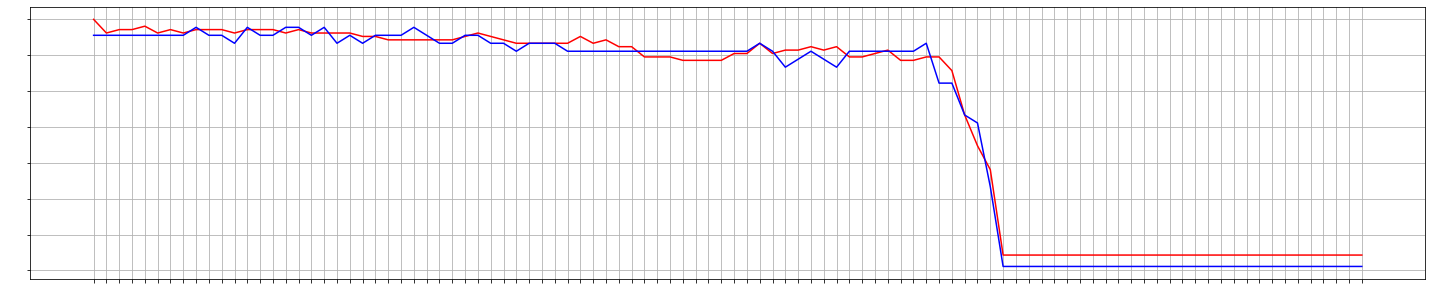

In [73]:
# 시각화
# 이웃의 수에 따른 score값의 변화
plt.figure(figsize=(25,5)) #출력할 그래프의 크기
plt.plot(range(1,101), #X데이터 = 1~100
        train_list, #y데이터
        c='red')
plt.plot(range(1,101), #X데이터 = 1~100
        test_list, #y데이터
        c='blue')
plt.xticks(range(1,101))
plt.tick_params(axis = 'x', labelcolor = 'w')
plt.tick_params(axis = 'y', labelcolor = 'w')
plt.grid()#기준선
plt.show()

In [ ]:
# 최적의 이웃수 : 9, 13, 17

### 5-3

In [83]:
knn_model = KNeighborsClassifier(n_neighbors = 9,
                                p = 1,
                                weights = 'distance'
                                )
#p=1 맨하튼 거리
#p=2 유클리드 거리
#distance 가중치를 거리에 반비례
#uniform 가중치를 동일하게

### 6-3

In [84]:
 knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

### 7-3

In [86]:
print('train score :',knn_model.score(X_train,y_train))
print('test score :', knn_model.score(X_test,y_test))

train score : 1.0
test score : 0.9555555555555556


In [91]:
# predict
knn_model.predict([[6.3,3.2,4.5,3.3]])

array([2])